In [2]:
#import all libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,balanced_accuracy_score,precision_recall_curve, roc_curve
from all_functions import *
from sklearn.ensemble import VotingClassifier

In [41]:
feature_selection='Strong_Feature'
Training='2017'
Features=10
Index_2016,Color_index_2016,All_columns,Maturity_2016,Final_Data_2016,Final_Data_Selected_2016=datacreate_2016(file='C:/Users/tusha/Downloads/Peanut_Maturity.csv'\
                                                                  ,path1='C:/All/Peanut_Maturity_Classification',W_select=199)
Index_2017,Color_index_2017,Maturity_2017,Final_Data_2017,Final_Data_Selected_2017=datacreate_2017(file='C:/Users/tusha/Downloads/Peanut_Maturity_.csv'\
                                                                  ,path2='C:/All/Peanut_Maturity_Classification_2017',W_select=199)

if Training=='2016':
    X_train_data,y_train_data,Train_Color_Index,Train_Index=Final_Data_Selected_2016,Maturity_2016,Color_index_2016,Index_2016
    X_test_data,y_test_data,Test_Color_Index,Test_Index=Final_Data_Selected_2017,Maturity_2017,Color_index_2017,Index_2017
elif Training=='2017':
    X_train_data,y_train_data,Train_Color_Index,Train_Index=Final_Data_Selected_2017,Maturity_2017,Color_index_2017,Index_2017
    X_test_data,y_test_data,Test_Color_Index,Test_Index=Final_Data_Selected_2016,Maturity_2016,Color_index_2016,Index_2016

if feature_selection=='Strong_Feature':
    X_train,X_test,y_train,y_test=Strong_feature_train_test_dataset_create(Features=Features,X_train=X_train_data,\
                                                        y_train=y_train_data,X_test=X_test_data,\
                                                        y_test=y_test_data)
elif feature_selection=='ANOVA':
    X_train,X_test,y_train,y_test=anova_train_test_dataset_create(Features=Features,X_train=X_train_data,\
                                                        y_train=y_train_data,X_test=X_test_data,\
                                                        y_test=y_test_data)    
elif feature_selection=='Max':
    X_train,X_test,y_train,y_test=Max_feature_train_test_dataset_create(Features=Features,X_train=X_train_data,\
                                                        y_train=y_train_data,X_test=X_test_data,\
                                                        y_test=y_test_data)  

elif feature_selection=='None':
    X_train,X_test,y_train,y_test=X_train_data,X_test_data,y_train_data,y_test_data      

In [42]:
X_train.shape

(315, 20)

In [43]:
#Set the model Random Forest classifier
"""
Make a pipline of preprocessing, a grid of parameters for the classifier, fit the model, evaluate the model (Writing into a text file) 
"""
file = open("Result_RF_v2.txt", "w")
pipe_rf = make_pipeline(StandardScaler(),PCA(n_components=10),RandomForestClassifier());
max_depth = np.arange(8,20,2)
np.append(max_depth,None)
parameter_grid_rf = [{'randomforestclassifier__n_estimators': np.arange(10,20,2),
               'randomforestclassifier__max_features': ['auto', 'sqrt'],
               'randomforestclassifier__max_depth': max_depth,
               'randomforestclassifier__min_samples_split': [2, 5, 10],
               'randomforestclassifier__min_samples_leaf': [4,5,6,7,9],
               'randomforestclassifier__bootstrap': [True, False],
               'randomforestclassifier__random_state': [1]}]
grf = GridSearchCV(estimator=pipe_rf,param_grid=parameter_grid_rf, scoring='accuracy',cv=10,refit=True,n_jobs=-1)
grf = grf.fit(X_train, y_train)

In [44]:
Score_train=grf.score(X_train, y_train)
Score_test=grf.score(X_test, y_test)

In [45]:
Score_train,Score_test

(1.0, 0.7777777777777778)

In [249]:
from joblib import dump, load
pipeline_rf = load(f'RF_Best_{Features}_{Training}_{feature_selection}.joblib') 
pipeline_rf.score(X_train, y_train),pipeline_rf.score(X_test, y_test)

y_pred_train=pipeline_rf.predict(X_train)
y_pred_test=pipeline_rf.predict(X_test)

Train_Confusion_matrix_rf, Test_Confusion_matrix_rf = confusion_matrix(y_train,y_pred_train), \
confusion_matrix(y_test,y_pred_test)
Train_specificity_rf, Test_specificity_rf = specificity(Train_Confusion_matrix_rf), specificity(Test_Confusion_matrix_rf)
Train_accuracy_score_rf,Test_accuracy_score_rf = pipeline_rf.score(X_train, y_train),pipeline_rf.score(X_test, y_test);
Train_precision_score_rf, Test_precision_score_rf=precision_score(y_train,y_pred_train,pos_label=0), \
precision_score(y_test,y_pred_test,pos_label=0)
Train_recall_score_rf, Test_recall_score_rf=recall_score(y_train,y_pred_train,pos_label=0), \
recall_score(y_test,y_pred_test,pos_label=0)
Train_balanced_accuracy_score_rf,Test_balanced_accuracy_score_rf=balanced_accuracy_score(y_train,y_pred_train),\
balanced_accuracy_score(y_test,y_pred_test)

Training_black_yellow=[pipeline_rf.score(X_train[Train_Color_Index[i]], y_train[Train_Color_Index[i]]) for i in range(4)]
Testing_black_yellow=[pipeline_rf.score(X_test[Test_Color_Index[i]], y_test[Test_Color_Index[i]]) for i in range(4)]
Training_species=[pipeline_rf.score(X_train[i*45:(i+1)*45], y_train[i*45:(i+1)*45]) for i in range(len(y_train)//45)]
Testing_species=[pipeline_rf.score(X_test[i*45:(i+1)*45], y_test[i*45:(i+1)*45]) for i in range(len(y_test)//45)]

#file = open(f"Result_RF_{Features}_{Training}_{feature_selection}_v2.txt", "w")
file = open(f"RF_Best_{Features}_{Training}_{feature_selection}_final.txt", "w")
file.write(f"\nBest parameter for Random Forest Model is:\n {str(pipeline_rf)}")
file.write(f"\n Metrics: Train_result ,Test_result ")
file.write(f"\n Confusion_matrix: Train_result: {Train_Confusion_matrix_rf},Test_result: {Test_Confusion_matrix_rf}")
file.write(f"\n Accuracy_score: Train_result: {Train_accuracy_score_rf},Test_result: {Test_accuracy_score_rf}")
file.write(f"\n Precision_score: Train_result: {Train_precision_score_rf},Test_result: {Test_precision_score_rf}")
file.write(f"\n Recall_score: Train_result: {Train_recall_score_rf},Test_result: {Test_recall_score_rf}")
file.write(f"\n Specificity: Train_result: {Train_specificity_rf},Test_result: {Test_specificity_rf}")
file.write(f"\n Balanced_accuracy: Train_result: {Train_balanced_accuracy_score_rf},Test_result: {Test_balanced_accuracy_score_rf}")
file.write(f"\n Accuracy Score_Color_species: Train_result: {Training_species},Test_result: {Testing_species}")
file.write(f"\n Accuracy Score_Color (Black,Brown,Yellow,Orange): Train_result: {Training_black_yellow},Test_result: {Testing_black_yellow}")
file.close()

In [251]:
Train_accuracy_score_rf,Test_accuracy_score_rf 

(0.9650793650793651, 0.8533333333333334)

In [236]:
# n_estimators=grf.best_params_['randomforestclassifier__n_estimators']
# max_depth=grf.best_params_['randomforestclassifier__max_depth']
# max_features=grf.best_params_['randomforestclassifier__max_features']
# min_samples_split=grf.best_params_['randomforestclassifier__min_samples_split']
# min_samples_leaf=grf.best_params_['randomforestclassifier__min_samples_leaf']
# bootstrap=grf.best_params_['randomforestclassifier__bootstrap']
Model_RF=RandomForestClassifier(n_estimators=11,max_depth=4,max_features='sqrt',
                                min_samples_split=4, min_samples_leaf=12, bootstrap=False,
                               random_state=1)
pipeline_rf = make_pipeline(StandardScaler(),PCA(n_components=12),Model_RF)
pipeline_rf =pipeline_rf.fit(X_train,y_train)
pipeline_rf.score(X_train, y_train),pipeline_rf.score(X_test, y_test)

(0.9682539682539683, 0.88)

In [252]:
import matplotlib as mpl
import seaborn as sns
mpl.style.use('seaborn')
tn,fp,fn,tp=Test_Confusion_matrix_rf.ravel()
conf_arr=[[fn,tn],[tp,fp]];
df_cm = pd.DataFrame(conf_arr, index = [ 'Immature', 'Mature'],columns = ['Immature', 'Mature'])
#df_cm.index.name = 'Predicted'
#df_cm.columns.name = 'Actual'
fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.ticklabel_format(style='plain') 
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
res = sns.heatmap(df_cm, annot=True, vmin=0, vmax=100, cmap='Blues', fmt='d', annot_kws={"size": 14})
res.invert_yaxis()
plt.yticks([0.5,1.5], [ 'Immature', 'Mature'],va='center',fontsize=14)
plt.xticks([0.5,1.5], [ 'Mature', 'Immature'],va='center',fontsize=14)
plt.title('Confusion Matrix',fontsize=14)
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.savefig(f'confusion_matrix_rf_testing_{Features}_{Training}_{feature_selection}.png', dpi=100, bbox_inches='tight')
plt.close()

In [253]:
tn,fp,fn,tp=Train_Confusion_matrix_rf.ravel()
conf_arr=[[fn,tn],[tp,fp]];
df_cm = pd.DataFrame(conf_arr, index = [ 'Immature', 'Mature'],columns = ['Immature', 'Mature'])
#df_cm.index.name = 'Predicted'
#df_cm.columns.name = 'Actual'
fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.ticklabel_format(style='plain') 
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
res = sns.heatmap(df_cm, annot=True, vmin=0, vmax=100, cmap='Blues', fmt='d', annot_kws={"size": 14})
res.invert_yaxis()
plt.yticks([0.5,1.5], [ 'Immature', 'Mature'],va='center',fontsize=14)
plt.xticks([0.5,1.5], [ 'Mature', 'Immature'],va='center',fontsize=14)
plt.title('Confusion Matrix',fontsize=14)
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.savefig(f'confusion_matrix_rf_Training_{Features}_{Training}_{feature_selection}.png', dpi=600, bbox_inches='tight')
plt.close()

In [254]:
import matplotlib.pyplot as plt

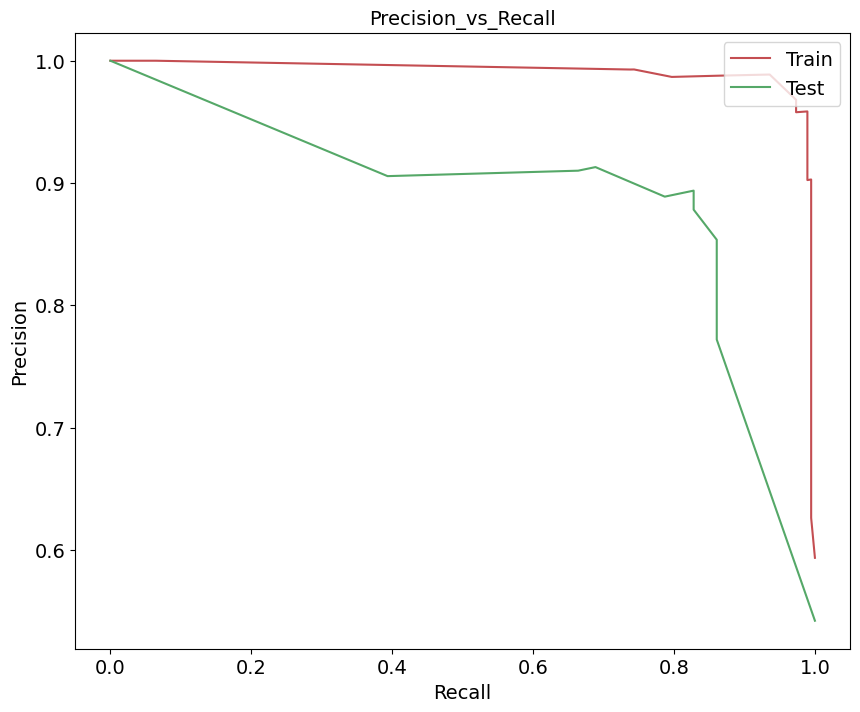

In [255]:
#Plotting ROC_AUC curve and Precision Recall_curve
mpl.style.use('default')
y_pred_train=pipeline_rf.predict_proba(X_train)
y_pred_test=pipeline_rf.predict_proba(X_test)
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_pred_train[:,1])
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_pred_test[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train[:,1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test[:,1])
plt.figure(figsize=(10,8))
plt.plot(recall_train,precision_train,'-r')
plt.plot(recall_test,precision_test,'-g')
plt.title('Precision_vs_Recall',fontsize=14)
plt.legend(['Train','Test'],loc ="upper right",fontsize=14)
plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(f'RF_Precision_vs_Recall_FS_{feature_selection}_Features_{Features}_Training_{Training}.jpg',dpi=600)

In [ ]:
from joblib import dump, load
pipeline_svm = load(f'SVM_Best_{Features}_{Training}_{feature_selection}.joblib') 
pipeline_svm.score(X_train, y_train),pipeline_svm.score(X_test, y_test)

y_pred_train=pipeline_svm.predict(X_train)
y_pred_test=pipeline_svm.predict(X_test)

Train_Confusion_matrix_svm, Test_Confusion_matrix_svm = confusion_matrix(y_train,y_pred_train), \
confusion_matrix(y_test,y_pred_test)
Train_specificity_svm, Test_specificity_svm = specificity(Train_Confusion_matrix_svm), specificity(Test_Confusion_matrix_svm)
Train_accuracy_score_svm,Test_accuracy_score_svm = pipeline_svm.score(X_train, y_train),pipeline_svm.score(X_test, y_test);
Train_precision_score_svm, Test_precision_score_svm=precision_score(y_train,y_pred_train,pos_label=0), \
precision_score(y_test,y_pred_test,pos_label=0)
Train_recall_score_svm, Test_recall_score_svm=recall_score(y_train,y_pred_train,pos_label=0), \
recall_score(y_test,y_pred_test,pos_label=0)
Train_balanced_accuracy_score_svm,Test_balanced_accuracy_score_svm=balanced_accuracy_score(y_train,y_pred_train),\
balanced_accuracy_score(y_test,y_pred_test)

Training_black_yellow=[pipeline_svm.score(X_train[Train_Color_Index[i]], y_train[Train_Color_Index[i]]) for i in range(4)]
Testing_black_yellow=[pipeline_svm.score(X_test[Test_Color_Index[i]], y_test[Test_Color_Index[i]]) for i in range(4)]
Training_species=[pipeline_svm.score(X_train[i*45:(i+1)*45], y_train[i*45:(i+1)*45]) for i in range(len(y_train)//45)]
Testing_species=[pipeline_svm.score(X_test[i*45:(i+1)*45], y_test[i*45:(i+1)*45]) for i in range(len(y_test)//45)]

# file = open(f"Result_svm_{Features}_{Training}_{feature_selection}.txt", "w")
file = open(f"SVM_Best_{Features}_{Training}_{feature_selection}_final.txt", "w")
file.write(f"\nBest parameter for Random Forest Model is:\n {str(pipeline_svm)}")
file.write(f"\n Metrics: Train_result ,Test_result ")
file.write(f"\n Confusion_matrix: Train_result: {Train_Confusion_matrix_svm},Test_result: {Test_Confusion_matrix_svm}")
file.write(f"\n Accuracy_score: Train_result: {Train_accuracy_score_svm},Test_result: {Test_accuracy_score_svm}")
file.write(f"\n Precision_score: Train_result: {Train_precision_score_svm},Test_result: {Test_precision_score_svm}")
file.write(f"\n Recall_score: Train_result: {Train_recall_score_svm},Test_result: {Test_recall_score_svm}")
file.write(f"\n Specificity: Train_result: {Train_specificity_svm},Test_result: {Test_specificity_svm}")
file.write(f"\n Balanced_accuracy: Train_result: {Train_balanced_accuracy_score_svm},Test_result: {Test_balanced_accuracy_score_svm}")
file.write(f"\n Accuracy Score_Color_species: Train_result: {Training_species},Test_result: {Testing_species}")
file.write(f"\n Accuracy Score_Color (Black,Brown,Yellow,Orange): Train_result: {Training_black_yellow},Test_result: {Testing_black_yellow}")
file.close()

In [ ]:
import numpy as np
Acc_2016S=0.5
Recall_2016S=0.5
Specificity_2016S=0.5

Acc_2016A=0.5
Recall_2016A=0.5
Specificity_2016A=0.5

Acc_2017S=0.5
Recall_2017S=0.5
Specificity_2017S=0.5

Acc_2017A=0.5
Recall_2017A=0.5
Specificity_2017A=0.5

Data_2016S=np.array([0.982,0.924,0.719,0.972])
Data_2016A=np.array([1,0.939,0.781,0.944])
Data_2017S=np.array([1,0.923,0.886,0.976])
Data_2017A=np.array([1,0.923,0.886,0.976])

D11=np.array([56,66,32,71])*Data_2016S
D12=np.array([56,66,32,71])*Data_2016A
print('2016 Strong||ANOVA')
print(f'Correct_Prediction:{int(Acc_2016S*225)}/225||{int(Acc_2016A*225)}/225')
print(f'Immature_Prediction:{int(Recall_2016S*103)}/103||{int(Recall_2016A*103)}/103')
print(f'Mature_Prediction:{int(Specificity_2016S*122)}/122||{int(Specificity_2016A*122)}/122')
print(f'Black {D11[0]}, Brown {D11[1]}, Yellow {D11[2]}, Orange {D11[3]}||\
Black {D12[0]}, Brown {D12[1]}, Yellow {D12[2]}, Orange {D12[3]}')

D21=np.array([83,104,44,84])*Data_2017S
D22=np.array([83,104,44,84])*Data_2017A

print('2017 Strong||ANOVA')
print(f'Correct_Prediction:{int(Acc_2017S*315)}/315||{int(Acc_2017A*315)}/315')
print(f'Immature_Prediction:{int(Recall_2017S*128)}/128||{int(Recall_2017A*103)}/128')
print(f'Mature_Prediction:{int(Specificity_2017S*187)}/187||{int(Specificity_2017A*187)}/187')
print(f'Black {D21[0]}||Black {D22[0]}, Brown {D21[1]}||Brown {D22[1]}, Yellow {D21[2]}||Yellow {D22[2]}, \
Orange {D21[3]}||Orange {D22[3]}')

In [ ]:
import numpy as np
#2017_training (2 tables)
#1st Table Strong
model='SVM'
Acc_2016S=0.849 #Test
Specificity_2016S=0.943
Recall_2016S=0.738

Acc_2017S=0.990 #Train
Specificity_2017S=0.995
Recall_2017S=0.984

Data_2016S=np.array([0.982,0.909,0.469,0.859]) #Black,Brown,Yellow, Orange
Data_2017S=np.array([1,0.99,0.955,1]) #Black,Brown,Yellow, Orange

#2nd Table Strong
Acc_2016A=0.876
Specificity_2016A=0.918
Recall_2016A=0.825

Acc_2017A=0.930
Specificity_2017A=0.995
Recall_2017A=0.836

Data_2016A=np.array([0.982,0.864,0.563,0.944])
Data_2017A=np.array([1,0.99,0.705,0.905])

#Main
Acc_2016=0.871 #Test
Recall_2016=0.893
Specificity_2016=0.853

Acc_2017=0.952 #Test
Recall_2017=0.945
Specificity_2017=0.957

Data_2016=np.array([0.893,0.818,0.718,0.972]) #Black,Brown,Yellow, Orange
Data_2017=np.array([1,0.923,0.886,0.972]) #Black,Brown,Yellow, Orange

###

file=open(f'Result_{model}.txt','w')
D11=np.rint(np.array([56,66,32,71])*Data_2016S)
D12=np.rint(np.array([56,66,32,71])*Data_2016A)
D13=np.rint(np.array([56,66,32,71])*Data_2016)

file.write('2016 Strong||ANOVA||HSI\n')
file.write(f'Correct_Prediction:{np.rint(Acc_2016S*225)}/225||{np.rint(Acc_2016A*225)}/225||{np.rint(Acc_2016*225)}/225\n')
file.write(f'Immature_Prediction:{np.rint(Recall_2016S*103)}/103||{np.rint(Recall_2016A*103)}/103||{np.rint(Recall_2016*103)}/103\n')
file.write(f'Mature_Prediction:{np.rint(Specificity_2016S*122)}/122||{np.rint(Specificity_2016A*122)}/122||{np.rint(Specificity_2016*122)}/122\n')
file.write(f'Yellow {D11[2]}/32||{D12[2]}/32||{D13[2]}/32, Orange {D11[3]}/71||{D12[3]}/71||{D13[3]}/71\n')
file.write(f'Black {D11[0]}/56||{D12[0]}/56||{D13[0]}/56, Brown {D11[1]}/66||{D12[1]}/66||{D13[1]}/66\n') 

D21=np.rint(np.array([83,104,44,84])*Data_2017S)
D22=np.rint(np.array([83,104,44,84])*Data_2017A)
D23=np.rint(np.array([83,104,44,84])*Data_2017)

file.write('2017 Strong||ANOVA||HSI\n')
file.write(f'Correct_Prediction:{np.rint(Acc_2017S*315)}/315||{np.rint(Acc_2017A*315)}/315||{np.rint(Acc_2017*315)}/315\n')
file.write(f'Immature_Prediction:{np.rint(Recall_2017S*128)}/128||{np.rint(Recall_2017A*128)}/128||{np.rint(Recall_2017*128)}/128\n')
file.write(f'Mature_Prediction:{np.rint(Specificity_2017S*187)}/187||{np.rint(Specificity_2017A*187)}/187||{np.rint(Specificity_2017*187)}/187\n')
file.write(f'Yellow {D21[2]}/44||{D22[2]}/44||{D23[2]}/44, Orange {D21[3]}/84||{D22[3]}/84||{D23[3]}/84\n')
file.write(f'Black {D21[0]}/83||{D22[0]}/83||{D23[0]}/83, Brown {D21[1]}/104||{D22[1]}/104||{D23[1]}/104\n')
file.close()

In [ ]:
#Set the model SVM model classification
"""
Make a pipline of preprocessing, a grid of parameters for the classifier, fit the model, evaluate the model (Writing into a text file) 
"""
pipe_svm = make_pipeline(StandardScaler(),PCA(n_components=2*Features-2),svm.SVC());
param_range=[10**i for i in [-2,-1, 0, 1, 2]];
parameter_grid_svm=[{'svc__probability':[True],
                     'svc__C':param_range,
                     'svc__gamma':param_range, 
                     'svc__kernel': ['rbf', 'sigmoid'], 
                     'svc__random_state': list(range(1,50))}]
gss = GridSearchCV(estimator=pipe_svm,param_grid=parameter_grid_svm, scoring='accuracy',cv=10,refit=True,n_jobs=-1)
gss = gss.fit(X_train, y_train)

In [ ]:
file='C:/Users/tusha/Downloads/Peanut_Maturity.csv'
DataFrame_2016=pd.read_csv(file).dropna(axis=0,how='all')
Index_2016=DataFrame_2016['Group'][0:-1:15].values
Maturity_2016=DataFrame_2016['Marure/Immature'].map({'M':1,'IM':0}).values
Color_peanut=DataFrame_2016['Color (M:black, brown/ IM: orange, yellow)'];
Color_peanut1=Color_peanut.map({'black':0,'brown':1,'orange':2, 'smashed /yellow':3, 'yellow':3}).values

In [ ]:
file='C:/Users/tusha/Downloads/Peanut_Maturity_.csv'
DataFrame_2017=pd.read_csv(file).dropna(axis=0,how='all')
Index_2017=DataFrame_2017['Plot '][0:-1:15].values
Color_peanut2=DataFrame_2017['Mesocarp'].map({'Black':0, 'Brown':1, 'Orange':2, 'Yellow':3}).values

In [ ]:
(56*0.982+66*0.924)/(56+66)

In [ ]:
np.array([56,66,32,71])*np.array([0.982,0.924,0.719,0.972])

In [ ]:
np.sum(np.array([83,104,44,84])*np.array([1,0.923,0.886,0.976]))

In [ ]:
np.array([56,66,32,71])*np.array([0.964,0.848,0.719,0.93])

In [ ]:
#Set the model SVM model classification
"""
Make a pipline of preprocessing, a grid of parameters for the classifier, fit the model, evaluate the model (Writing into a text file) 
"""
pipe_svm = make_pipeline(StandardScaler(),PCA(n_components=2*Features-2),svm.SVC());
param_range=[10**i for i in [-2,-1, 0, 1, 2]];
parameter_grid_svm=[{'svc__probability':[True],
                     'svc__C':param_range,
                     'svc__gamma':param_range, 
                     'svc__kernel': ['rbf', 'sigmoid'], 
                     'svc__random_state': list(range(1,50))}]
gss = GridSearchCV(estimator=pipe_svm,param_grid=parameter_grid_svm, scoring='accuracy',cv=10,refit=True,n_jobs=-1)
gss = gss.fit(X_train, y_train)

In [ ]:
# C=gss.best_params_['svc__C']
# gamma=gss.best_params_['svc__gamma']
# kernel=gss.best_params_['svc__kernel']
# random_state=gss.best_params_['svc__random_state']
Model_SVM=svm.SVC(probability=True, C=100, gamma=0.001, kernel='rbf', random_state=1)
pipeline_svm = make_pipeline(StandardScaler(),PCA(n_components=2),Model_SVM)
pipeline_svm=pipeline_svm.fit(X_train,y_train)
pipeline_svm.score(X_train, y_train),pipeline_svm.score(X_test, y_test)

In [ ]:
Training_black_yellow=[pipeline_svm.score(X_train[Train_Color_Index[i]], y_train[Train_Color_Index[i]]) for i in range(4)]
Testing_black_yellow=[pipeline_svm.score(X_test[Test_Color_Index[i]], y_test[Test_Color_Index[i]]) for i in range(4)]
Training_species=[pipeline_svm.score(X_train[i*15:(i+1)*15], y_train[i*15:(i+1)*15]) for i in range(len(y_train)//45)]
Testing_species=[pipeline_svm.score(X_test[i*15:(i+1)*15], y_test[i*15:(i+1)*15]) for i in range(len(y_test)//45)]
(Training_black_yellow,Testing_black_yellow,Training_species,Testing_species)

In [ ]:
y_pred_train=pipeline_svm.predict(X_train)
y_pred_test=pipeline_svm.predict(X_test)
Train_Confusion_matrix_svm, Test_Confusion_matrix_svm = confusion_matrix(y_train,y_pred_train), \
confusion_matrix(y_test,y_pred_test)
Train_specificity_svm, Test_specificity_svm = specificity(Train_Confusion_matrix_svm), specificity(Test_Confusion_matrix_svm)
Train_accuracy_score_svm,Test_accuracy_score_svm = pipeline_svm.score(X_train, y_train),pipeline_svm.score(X_test, y_test);
Train_precision_score_svm, Test_precision_score_svm=precision_score(y_train,y_pred_train), precision_score(y_test,y_pred_test)
Train_recall_score_svm, Test_recall_score_svm=recall_score(y_train,y_pred_train), recall_score(y_test,y_pred_test)
Train_f1_score_svm, Test_f1_score_svm=f1_score(y_train,y_pred_train), f1_score(y_test,y_pred_test)
Train_balanced_accuracy_score_svm,Test_balanced_accuracy_score_svm=balanced_accuracy_score(y_train,y_pred_train),\
balanced_accuracy_score(y_test,y_pred_test)

Training_black_yellow=[pipeline_svm.score(X_train[Train_Color_Index[i]], y_train[Train_Color_Index[i]]) for i in range(4)]
Testing_black_yellow=[pipeline_svm.score(X_test[Test_Color_Index[i]], y_test[Test_Color_Index[i]]) for i in range(4)]
Training_species=[pipeline_svm.score(X_train[i*45:(i+1)*45], y_train[i*45:(i+1)*45]) for i in range(len(y_train)//45)]
Testing_species=[pipeline_svm.score(X_test[i*45:(i+1)*45], y_test[i*45:(i+1)*45]) for i in range(len(y_test)//45)]

# file = open(f"Result_SVM_{Features}_{Training}_{feature_selection}.txt", "w")
file = open(f"LR_Best_{Features}_{Training}_{feature_selection}_final.txt", "w")
file.write(f"\nBest parameter for Support Vector Machine Model is:\n {str(pipeline_svm)}")
file.write(f"\n Metrics: Train_result ,Test_result ")
file.write(f"\n Confusion_matrix: Train_result: {Train_Confusion_matrix_svm},Test_result: {Test_Confusion_matrix_svm}")
file.write(f"\n Accuracy_score: Train_result: {Train_accuracy_score_svm},Test_result: {Test_accuracy_score_svm}")
file.write(f"\n Precision_score: Train_result: {Train_precision_score_svm},Test_result: {Test_precision_score_svm}")
file.write(f"\n Recall_score: Train_result: {Train_recall_score_svm},Test_result: {Test_recall_score_svm}")
file.write(f"\n f1_score: Train_result: {Train_f1_score_svm},Test_result: {Test_f1_score_svm}")
file.write(f"\n Balanced_accuracy: Train_result: {Train_balanced_accuracy_score_svm},Test_result: {Test_balanced_accuracy_score_svm}")
file.write(f"\n Specificity: Train_result: {Train_specificity_svm},Test_result: {Test_specificity_svm}")
file.write(f"\n Accuracy Score_Color (Black,Brown,Yellow,Orange): Train_result: {Training_black_yellow},Test_result: {Testing_black_yellow}")
file.write(f"\n Accuracy Score_Color_species: Train_result: {Training_species},Test_result: {Testing_species}")
file.close()

In [ ]:
from joblib import dump, load
#dump(pipeline_svm, f'SVM_Best_{Features}_{Training}_{feature_selection}.joblib') 
pipeline_rf = load(f'LR_Best_{Features}_{Training}_{feature_selection}.joblib') 
pipeline_rf.score(X_train, y_train),pipeline_rf.score(X_test, y_test)

In [ ]:
#Set the model Random Forest classifier
"""
Make a pipline of preprocessing, a grid of parameters for the classifier, fit the model, evaluate the model (Writing into a text file) 
"""
file = open("Result_RF.txt", "w")
pipe_rf = make_pipeline(StandardScaler(),PCA(n_components=11),RandomForestClassifier());
max_depth = np.arange(8,20,2)
np.append(max_depth,None)
parameter_grid_rf = [{'randomforestclassifier__n_estimators': np.arange(10,20,2),
               'randomforestclassifier__max_features': ['auto', 'sqrt'],
               'randomforestclassifier__max_depth': max_depth,
               'randomforestclassifier__min_samples_split': [2, 5, 10],
               'randomforestclassifier__min_samples_leaf': [4,5,6,7,9],
               'randomforestclassifier__bootstrap': [True, False],
               'randomforestclassifier__random_state': [1]}]
grf = GridSearchCV(estimator=pipe_rf,param_grid=parameter_grid_rf, scoring='accuracy',cv=10,refit=True,n_jobs=-1)
grf = grf.fit(X_train, y_train)

In [ ]:
# n_estimators=grf.best_params_['randomforestclassifier__n_estimators']
# max_depth=grf.best_params_['randomforestclassifier__max_depth']
# max_features=grf.best_params_['randomforestclassifier__max_features']
# min_samples_split=grf.best_params_['randomforestclassifier__min_samples_split']
# min_samples_leaf=grf.best_params_['randomforestclassifier__min_samples_leaf']
# bootstrap=grf.best_params_['randomforestclassifier__bootstrap']
Model_RF=RandomForestClassifier(n_estimators=5,max_depth=10,max_features='sqrt',
                                min_samples_split=4, min_samples_leaf=4, bootstrap=False,
                               random_state=1)
pipeline_rf = make_pipeline(StandardScaler(),PCA(n_components=5),Model_RF)
pipeline_rf=pipeline_rf.fit(X_train,y_train)
pipeline_rf.score(X_train, y_train),pipeline_rf.score(X_test, y_test)

In [ ]:
y_pred_train=pipeline_rf.predict(X_train)
y_pred_test=pipeline_rf.predict(X_test)

Train_Confusion_matrix_rf, Test_Confusion_matrix_rf = confusion_matrix(y_train,y_pred_train), \
confusion_matrix(y_test,y_pred_test)
Train_specificity_rf, Test_specificity_rf = specificity(Train_Confusion_matrix_rf), specificity(Test_Confusion_matrix_rf)
Train_accuracy_score_rf,Test_accuracy_score_rf = pipeline_rf.score(X_train, y_train),pipeline_rf.score(X_test, y_test);
Train_precision_score_rf, Test_precision_score_rf=precision_score(y_train,y_pred_train), precision_score(y_test,y_pred_test)
Train_recall_score_rf, Test_recall_score_rf=recall_score(y_train,y_pred_train), recall_score(y_test,y_pred_test)
Train_f1_score_rf, Test_f1_score_rf=f1_score(y_train,y_pred_train), f1_score(y_test,y_pred_test)
Train_balanced_accuracy_score_rf,Test_balanced_accuracy_score_rf=balanced_accuracy_score(y_train,y_pred_train),\
balanced_accuracy_score(y_test,y_pred_test)

Training_black_yellow=[pipeline_rf.score(X_train[Train_Color_Index[i]], y_train[Train_Color_Index[i]]) for i in range(4)]
Testing_black_yellow=[pipeline_rf.score(X_test[Test_Color_Index[i]], y_test[Test_Color_Index[i]]) for i in range(4)]
Training_species=[pipeline_rf.score(X_train[i*45:(i+1)*45], y_train[i*45:(i+1)*45]) for i in range(len(y_train)//45)]
Testing_species=[pipeline_rf.score(X_test[i*45:(i+1)*45], y_test[i*45:(i+1)*45]) for i in range(len(y_test)//45)]


file = open(f"RF_Best_{Features}_{Training}_{feature_selection}_main.txt", "w")
file.write(f"\nBest parameter for Random Forest Model is:\n {str(pipeline_rf)}")
file.write(f"\n Metrics: Train_result ,Test_result ")
file.write(f"\n Confusion_matrix: Train_result: {Train_Confusion_matrix_rf},Test_result: {Test_Confusion_matrix_rf}")
file.write(f"\n Accuracy_score: Train_result: {Train_accuracy_score_rf},Test_result: {Test_accuracy_score_rf}")
file.write(f"\n Precision_score: Train_result: {Train_precision_score_rf},Test_result: {Test_precision_score_rf}")
file.write(f"\n Recall_score: Train_result: {Train_recall_score_rf},Test_result: {Test_recall_score_rf}")
file.write(f"\n f1_score: Train_result: {Train_f1_score_rf},Test_result: {Test_f1_score_rf}")
file.write(f"\n Balanced_accuracy: Train_result: {Train_balanced_accuracy_score_rf},Test_result: {Test_balanced_accuracy_score_rf}")
file.write(f"\n Specificity: Train_result: {Train_specificity_rf},Test_result: {Test_specificity_rf}")
file.write(f"\n Accuracy Score_Color (Black,Brown,Yellow,Orange): Train_result: {Training_black_yellow},Test_result: {Testing_black_yellow}")
file.write(f"\n Accuracy Score_Color_species: Train_result: {Training_species},Test_result: {Testing_species}")
file.close()

In [ ]:
from joblib import dump, load
dump(pipeline_rf, f'RF_Best_{Features}_{Training}_{feature_selection}_main.joblib') 
clf = load(f'Rf_Best_{Features}_{Training}_{feature_selection}_main.joblib') 
clf.score(X_train, y_train),clf.score(X_test, y_test)

In [ ]:
ensemble = VotingClassifier(estimators=[('lr', Model_LR), ('svm', Model_SVM), ('rf', Model_RF)], voting='soft')
pipeline_ensemble = make_pipeline(StandardScaler(),PCA(n_components=2*Features-2),ensemble)
pipeline_ensemble = pipeline_ensemble.fit(X_train, y_train)

y_pred_train=pipeline_ensemble.predict(X_train)
y_pred_test=pipeline_ensemble.predict(X_test)

Train_Confusion_matrix_en, Test_Confusion_matrix_en = confusion_matrix(y_train,y_pred_train), \
confusion_matrix(y_test,y_pred_test)
Train_specificity_en, Test_specificity_en = specificity(Train_Confusion_matrix_en), specificity(Test_Confusion_matrix_en)
Train_accuracy_score_en,Test_accuracy_score_en = pipeline_ensemble.score(X_train, y_train),pipeline_ensemble.score(X_test, y_test);
Train_precision_score_en, Test_precision_score_en=precision_score(y_train,y_pred_train), precision_score(y_test,y_pred_test)
Train_recall_score_en, Test_recall_score_en=recall_score(y_train,y_pred_train), recall_score(y_test,y_pred_test)
Train_f1_score_en, Test_f1_score_en=f1_score(y_train,y_pred_train), f1_score(y_test,y_pred_test)
Train_balanced_accuracy_score_en,Test_balanced_accuracy_score_en=balanced_accuracy_score(y_train,y_pred_train),\
balanced_accuracy_score(y_test,y_pred_test)

Training_black_yellow=[pipeline_ensemble.score(X_train[Train_Color_Index[i]], y_train[Train_Color_Index[i]]) for i in range(4)]
Testing_black_yellow=[pipeline_ensemble.score(X_test[Test_Color_Index[i]], y_test[Test_Color_Index[i]]) for i in range(4)]
Training_species=[pipeline_ensemble.score(X_train[i*15:(i+1)*15], y_train[i*15:(i+1)*15]) for i in range(len(y_train)//45)]
Testing_species=[pipeline_ensemble.score(X_test[i*15:(i+1)*15], y_test[i*15:(i+1)*15]) for i in range(len(y_test)//45)]

file = open(f"Result_ensemble_{Features}_{Training}_{feature_selection}.txt", "w")
file.write(f"\nBest parameter for Random Forest Model is:\n {str(pipeline_ensemble['votingclassifier'])}")
file.write(f"\n Metrics: Train_result ,Test_result ")
file.write(f"\n Confusion_matrix: Train_result: {Train_Confusion_matrix_en},Test_result: {Test_Confusion_matrix_en}")
file.write(f"\n Accuracy_score: Train_result: {Train_accuracy_score_en},Test_result: {Test_accuracy_score_en}")
file.write(f"\n Precision_score: Train_result: {Train_precision_score_en},Test_result: {Test_precision_score_en}")
file.write(f"\n Recall_score: Train_result: {Train_recall_score_en},Test_result: {Test_recall_score_en}")
file.write(f"\n f1_score: Train_result: {Train_f1_score_en},Test_result: {Test_f1_score_en}")
file.write(f"\n Balanced_accuracy: Train_result: {Train_balanced_accuracy_score_en},Test_result: {Test_balanced_accuracy_score_en}")
file.write(f"\n Accuracy Score_Color (Black,Brown,Yellow,Orange): Train_result: {Training_black_yellow},Test_result: {Testing_black_yellow}")
file.write(f"\n Accuracy Score_Color_species: Train_result: {Training_species},Test_result: {Testing_species}")
file.close()

In [ ]:
#Plotting ROC_AUC curve and Precision Recall_curve
plot_cultivars(Feature1=Final_Data_2016,Feature2=Final_Data_2017,Label1=Maturity_2016,Label2=Maturity_2017,Cultivar='All',Index=Index_2017)
plot_cultivars(Feature1=Final_Data_2016,Feature2=Final_Data_2017,Label1=Maturity_2016,Label2=Maturity_2017,Cultivar='3C',Index=Index_2017)
#plot_cultivars(Feature=Final_Data_2016,Label=Maturity_2016,year='2016',Cultivar='All',Index=Index_2016)
# plot_cultivars(Feature=Final_Data_2017,Label=Maturity_2017,year='2017',Cultivar='3C',Index=Index_2017)
# plot_cultivars(Feature=Final_Data_2016,Label=Maturity_2016,year='2016',Cultivar='3C',Index=Index_2016)

In [ ]:
y_pred_train=pipeline_lr.predict_proba(X_train)
y_pred_test=pipeline_lr.predict_proba(X_test)
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_pred_train[:,1])
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_pred_test[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train[:,1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test[:,1])
plt.figure(figsize=(10,8))
plt.plot(recall_train,precision_train,'-r')
plt.plot(recall_test,precision_test,'-g')
plt.title('Precision_vs_Recall')
plt.legend(['Train','Test'],loc ="upper right")
plt.savefig(f'LR_Precision_vs_Recall_Features_{Features}_Training_{Training}.jpg',dpi=600)
plt.figure(figsize=(10,8))
plt.plot(fpr_train,tpr_train,'-r')
plt.plot(fpr_test,tpr_test,'-g')
plt.title('ROC')
plt.legend(['Train','Test'],loc ="upper right")
plt.savefig(f'LR_ROC_Features_{Features}_Training_{Training}_{feature_selection}.jpg',dpi=600)

In [ ]:
#Plotting ROC_AUC curve and Precision Recall_curve

y_pred_train=pipeline_svm.predict_proba(X_train)
y_pred_test=pipeline_svm.predict_proba(X_test)
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_pred_train[:,1])
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_pred_test[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train[:,1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test[:,1])
plt.figure(figsize=(10,8))
plt.plot(recall_train,precision_train,'-r')
plt.plot(recall_test,precision_test,'-g')
plt.title('Precision_vs_Recall')
plt.legend(['Train','Test'],loc ="upper right")
plt.savefig(f'SVM_Precision_vs_Recall_Features_{Features}_Training_{Training}.jpg',dpi=600)
plt.figure(figsize=(10,8))
plt.plot(fpr_train,tpr_train,'-r')
plt.plot(fpr_test,tpr_test,'-g')
plt.title('ROC')
plt.legend(['Train','Test'],loc ="upper right")
plt.savefig(f'SVM_ROC_Features_{Features}_Training_{Training}_{feature_selection}.jpg',dpi=600)

In [ ]:
#Plotting ROC_AUC curve and Precision Recall_curve
y_pred_train=pipeline_ensemble.predict_proba(X_train)
y_pred_test=pipeline_ensemble.predict_proba(X_test)
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_pred_train[:,1])
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_pred_test[:,1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train[:,1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test[:,1])
plt.figure(figsize=(10,8))
plt.plot(recall_train,precision_train,'-r')
plt.plot(recall_test,precision_test,'-g')
plt.title('Precision_vs_Recall')
plt.legend(['Train','Test'],loc ="upper right")
plt.savefig(f'Ensemble_Precision_vs_Recall_Features_{Features}_Training_{Training}.jpg',dpi=600)
plt.figure(figsize=(10,8))
plt.plot(fpr_train,tpr_train,'-r')
plt.plot(fpr_test,tpr_test,'-g')
plt.title('ROC')
plt.legend(['Train','Test'],loc ="upper right")
plt.savefig(f'Ensemble_ROC_Features_{Features}_Training_{Training}_{feature_selection}.jpg',dpi=600)

In [ ]:
W=np.array([400.450400,401.673000, 402.896000, 404.119400, 405.343300, 406.567600, 407.792400, 409.017500, 
410.243100, 411.469100, 412.695500, 413.922300, 415.149600, 416.377300, 417.605300, 
418.833900, 420.062800, 421.292200, 422.521900, 423.752100, 424.982700, 426.213700, 
427.445100, 428.676900, 429.909100, 431.141700, 432.374800, 433.608200, 434.842000, 
436.076300, 437.310900, 438.546000, 439.781400, 441.017300, 442.253500, 443.490100, 
444.727200, 445.964600, 447.202500, 448.440600, 449.679300, 450.918300, 452.157700, 
453.397400, 454.637600, 455.878200, 457.119100, 458.360400, 459.602100, 460.844200, 
462.086700, 463.329600, 464.572800, 465.816400, 467.060400, 468.304700, 469.549500, 
470.794600, 472.040200, 473.286000, 474.532200, 475.778900, 477.025800, 478.273200, 
479.520900, 480.769000, 482.017500, 483.266300, 484.515400, 485.765000, 487.014900, 
488.265200, 489.515800, 490.766800, 492.018100, 493.269800, 494.521900, 495.774300, 
497.027100, 498.280200, 499.533700, 500.787500, 502.041700, 503.296200, 504.551100, 
505.806300, 507.061800, 508.317700, 509.574000, 510.830600, 512.087500, 513.344800, 
514.602400, 515.860400, 517.118700, 518.377300, 519.636400, 520.895600, 522.155300, 
523.415300, 524.675500, 525.936200, 527.197100, 528.458500, 529.720100, 530.982100, 
532.244300, 533.507000, 534.769900, 536.033100, 537.296700, 538.560500, 539.824800, 
541.089400, 542.354200, 543.619400, 544.884900, 546.150600, 547.416800, 548.683200, 
549.950000, 551.217000, 552.484400, 553.752100, 555.020100, 556.288300, 557.556900, 
558.825900, 560.095100, 561.364600, 562.634400, 563.904500, 565.174900, 566.445700, 
567.716700, 568.988000, 570.259600, 571.531500, 572.803700, 574.076200, 575.349000, 
576.622100, 577.895400, 579.169100, 580.443000, 581.717300, 582.991800, 584.266600, 
585.541700, 586.817000, 588.092800, 589.368700, 590.644900, 591.921400, 593.198100, 
594.475200, 595.752600, 597.030200, 598.308000, 599.586200, 600.864600, 602.143300, 
603.422300, 604.701500, 605.981100, 607.260900, 608.540900, 609.821200, 611.101700, 
612.382600, 613.663700, 614.945100, 616.226700, 617.508500, 618.790700, 620.073100, 
621.355800, 622.638700, 623.921900, 625.205300, 626.488900, 627.772800, 629.057000, 
630.341400, 631.626100, 632.911100, 634.196300, 635.481700, 636.767300, 638.053200, 
639.339400, 640.625700, 641.912400, 643.199200, 644.486300, 645.773700, 647.061300, 
648.349100, 649.637200, 650.925400, 652.214000, 653.502700, 654.791700, 656.080900, 
657.370400, 658.660000, 659.950000, 661.240100, 662.530400, 663.821000, 665.111800, 
666.402800, 667.694100, 668.985500, 670.277200, 671.569100, 672.861200, 674.153600, 
675.446000, 676.738900, 678.031900, 679.325000, 680.618400, 681.912000, 683.205800, 
684.499800, 685.794100, 687.088500, 688.383200, 689.678000, 690.973000, 692.268300, 
693.563700, 694.859400, 696.155200, 697.451300, 698.747600, 700.043900, 701.340600, 
702.637500, 703.934400, 705.231700, 706.529100, 707.826700, 709.124500, 710.422400, 
711.720600, 713.018900, 714.317500, 715.616200, 716.915100, 718.214200, 719.513400, 
720.812900, 722.112500, 723.412400, 724.712300, 726.012500, 727.312700, 728.613300, 
729.914000, 731.214800, 732.515900, 733.817100, 735.118400, 736.419900, 737.721700, 
739.023500, 740.325600, 741.627700, 742.930100, 744.232700, 745.535300, 746.838100, 
748.141100, 749.444300, 750.747600, 752.051100, 753.354700, 754.658500, 755.962400, 
757.266500, 758.570800, 759.875200, 761.179700, 762.484400, 763.789200, 765.094200, 
766.399400, 767.704600, 769.010000, 770.315600, 771.621300, 772.927100, 774.233200, 
775.539200, 776.845500, 778.151900, 779.458400, 780.765100, 782.071900, 783.378800, 
784.685900, 785.993000, 787.300400, 788.607800, 789.915400, 791.223100, 792.530900, 
793.838900, 795.147000, 796.455200, 797.763500, 799.071900, 800.380500, 801.689200, 
802.998000, 804.306900, 805.615900, 806.925000, 808.234300, 809.543700, 810.853100, 
812.162700, 813.472500, 814.782300, 816.092200, 817.402200, 818.712400, 820.022600, 
821.332900, 822.643400, 823.953900, 825.264600, 826.575300, 827.886200, 829.197100, 
830.508200, 831.819300, 833.130500, 834.441900, 835.753300, 837.064800, 838.376300, 
839.688000, 840.999900, 842.311700, 843.623700, 844.935700, 846.247800, 847.560100, 
848.872300, 850.184700, 851.497100, 852.809700, 854.122300, 855.435000, 856.747700, 
858.060500, 859.373500, 860.686500, 861.999500, 863.312700, 864.625900, 865.939200, 
867.252600, 868.565900, 869.879400, 871.193000, 872.506600, 873.820300, 875.134000, 
876.447800, 877.761700, 879.075600, 880.389500, 881.703600, 883.017700, 884.331800, 
885.646100, 886.960300, 888.274700, 889.589000, 890.903400, 892.217900, 893.532400, 
894.846900, 896.161600, 897.476300, 898.791000, 900.105700, 901.420500, 902.735400, 
904.050200, 905.365100, 906.680100, 907.995000, 909.310100, 910.625100, 911.940200, 
913.255400, 914.570600, 915.885700, 917.200900, 918.516200, 919.831500, 921.146900, 
922.462200, 923.777600, 925.093000, 926.408400, 927.723800, 929.039300, 930.354700, 
931.670300, 932.985800, 934.301400, 935.616900, 936.932500, 938.248000, 939.563700, 
940.879300, 942.194900, 943.510600, 944.826200, 946.141900, 947.457600, 948.773300, 
950.088900, 951.404700, 952.720300, 954.036000, 955.351700, 956.667400, 957.983200, 
959.298800, 960.614600, 961.930200, 963.246000, 964.561600, 965.877300, 967.193000, 
968.508700, 969.824300, 971.140000, 972.455600, 973.771200, 975.086900, 976.402500, 
977.718100, 979.033700, 980.349200, 981.664800, 982.980200, 984.295800, 985.611300, 
986.926700, 988.242200, 989.557600, 990.872900, 992.188400, 993.503700, 994.819000, 
996.134300, 997.449500, 998.764800, 1000.080000]).astype('int')

def plot_cultivars(Feature1,Feature2,Label1,Label2,Index,Cultivar='3C',Wavelength=W):
    if Cultivar=='All':
        Data_mature1=np.mean(Feature1[Label1==1],axis=0)
        Data_immature1=np.mean(Feature1[Label1==0],axis=0)
        Data_mature1=np.mean(Feature1[Label1==1],axis=0)
        Data_immature1=np.mean(Feature1[Label1==0],axis=0)
        
        Data_mature2=np.mean(Feature2[Label2==1],axis=0)
        Data_immature2=np.mean(Feature2[Label2==0],axis=0) 
        Data_mature2=np.mean(Feature2[Label2==1],axis=0)
        Data_immature2=np.mean(Feature2[Label2==0],axis=0)
        
        plt.figure(figsize=(10,8))
        #plt.title('Peanut Maturity Vs Immaturity',fontsize=24)
        plt.plot(Wavelength,Data_mature1,'-b')
        plt.plot(Wavelength,Data_immature1,'-r')
        plt.plot(Wavelength,Data_mature2,'--b')
        plt.plot(Wavelength,Data_immature2,'--r')
        
        plt.xticks(Wavelength[::60], Wavelength[::60], rotation ='vertical',fontsize=18)
        plt.yticks(fontsize=18)
        plt.xlabel('Wavelength',fontsize=18)
        plt.ylabel('Relectance',fontsize=18)           
        plt.legend(['Mature_2016','Immature_2016','Mature_2017','Immature_2017'],loc ="upper left",fontsize=18)
#         plt.show()
        plt.savefig(f'MatureVsImmature.jpg',dpi=600)
    else:    
        idx=np.where(Index==Cultivar)[0][0]
        Data_3C1=Feature1[idx*15:(idx+1)*15]
        Label_3C1=Label1[idx*15:(idx+1)*15]
        Data_3C_M1=np.mean(Data_3C1[Label_3C1==1],axis=0)
        Data_3C_IM1=np.mean(Data_3C1[Label_3C1==0],axis=0)
        
        idx=np.where(Index==Cultivar)[0][0]
        Data_3C2=Feature2[idx*15:(idx+1)*15]
        Label_3C2=Label2[idx*15:(idx+1)*15]
        Data_3C_M2=np.mean(Data_3C2[Label_3C2==1],axis=0)
        Data_3C_IM2=np.mean(Data_3C2[Label_3C2==0],axis=0)
        
        Data_3C_M=(Data_3C_M1+Data_3C_M2)/2
        Data_3C_IM=(Data_3C_IM1+Data_3C_IM2)/2
        
        plt.figure(figsize=(10,8))
        #plt.title(f'Spectrum of Cultivars {Cultivar}')
        plt.plot(Wavelength,Data_3C_M,'-b')
        plt.plot(Wavelength,Data_3C_IM,'-r')
        
        
        plt.xticks(Wavelength[::60], Wavelength[::60], rotation ='vertical',fontsize=18)
        plt.yticks(fontsize=18)
        plt.xlabel('Wavelength',fontsize=18)
        plt.ylabel('Relectance',fontsize=18)           
        plt.legend(['Mature','Immature'],loc ="upper left",fontsize=18)
#         plt.show()
        plt.savefig(f'MatureVsImmature_{Cultivar}.jpg',dpi=600)

In [ ]:
import cv2
from PIL import Image
Img=cv2.imread('C:/Users/Tusha/Downloads/Peanut_identification_1B_1-15_Side2.jpg')
Imgf=cv2.flip(Img,0)
RGBimage = cv2.cvtColor(Imgf, cv2.COLOR_BGR2RGB)

In [ ]:
PILimage = Image.fromarray(RGBimage)

In [ ]:
PILimage.save('Peanut_Identify.png', dpi=(600,600))